In [116]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy

In [ ]:
# read in csv DR 18 from sdss
df = pd.read_csv('sdss.csv')

In [27]:
# quality check look at size, first five rows, stats, and info
def check_quality(dataframe):
    print(f'SIZE:\n number of rows: {dataframe.shape[0]}\n number of cols:{dataframe.shape[1]}\n')
    print(f'INFO:\n {dataframe.info()}\n')
    print(f'COL STATS:\n {df.describe()}')

check_quality(df)

SIZE:
 number of rows: 30000
 number of cols:13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        30000 non-null  float64
 1   dec       30000 non-null  float64
 2   dered_u   30000 non-null  float64
 3   dered_g   30000 non-null  float64
 4   dered_r   30000 non-null  float64
 5   dered_i   30000 non-null  float64
 6   dered_z   30000 non-null  float64
 7   class     30000 non-null  object 
 8   redshift  30000 non-null  float64
 9   plate     30000 non-null  int64  
 10  mjd       30000 non-null  int64  
 11  probPSF   30000 non-null  int64  
 12  mode      30000 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 3.0+ MB
INFO:
 None

COL STATS:
                  ra           dec       dered_u       dered_g       dered_r  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean     149

In [29]:
'''
30,000 points with 20 diff columns.
the following cols aren't useful.. just names for each event:
objid, run, rerun, fiberid,specobjid, camcol

the following cols aren't useful since we have ra and dec:
field

the following cols are not useful since all are the same:
mode: all are 1 and this means that all entries are primary events
'''
df = df.drop(['objid','mode','run','rerun','specobjid','camcol','field','fiberid'],axis=1)



In [ ]:
# check what cols remain
print(df.head())
'''
from df.describe() probPSF something strange is going on for lower 25%
probPSF is a probability so we can drop neg values
lets look at what values exist using df.value_counts()
'''
print(df.probPSF.value_counts())

           ra        dec   dered_u   dered_g   dered_r   dered_i   dered_z  \
0  128.882533  54.928917  19.43687  17.76148  17.13218  16.91798  16.80427   
1  128.871464  54.967883  19.22869  18.08300  17.66953  17.49974  17.44089   
2    8.642699  -9.461544  20.47800  19.48022  19.40721  19.40105  19.31647   
3    9.035362  -9.373860  19.66633  18.18865  17.61381  17.40076  17.23395   
4    9.050701  -9.520176  18.82208  17.59743  17.15259  16.96230  16.86727   

  class  redshift  plate    mjd  probPSF  
0  STAR -0.000153   3362  54939        1  
1  STAR  0.000061   3362  54939        1  
2  STAR -0.000525   3105  54825        1  
3  STAR  0.000059   3105  54825        1  
4  STAR -0.000098   3105  54825        1  
probPSF
 1       19060
 0       10938
-9999        2
Name: count, dtype: int64


In [32]:
# drop negative values for probPSF
df = df[df['probPSF']>= 0]

In [96]:
# convert modified julian date to standard date
df['date'] = pd.to_datetime(df.mjd, unit='D', origin='1858-11-17')

# check what our years our data spans
print(f'the dataset spans {df.date.dt.year.max()-df.date.dt.year.min()} years from \
{df.date.dt.year.min()} to {df.date.dt.year.max()}')


the dataset spans 20 years from 2000 to 2020


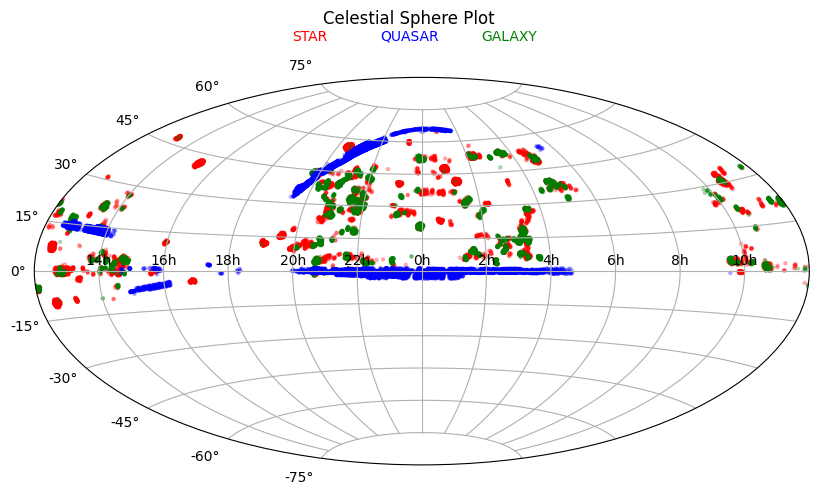

In [155]:
# we know temporal spread of data lets look at spacial distribution

def plot_celestial(ra_deg, dec_deg, obj_class):
    """Plots RA and Dec on an Aitoff projection."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='aitoff')
    ax.grid(True)
    # Convert RA to -180 to 180 range for Aitoff projection 
    # 0 to 360 --> -180 to 180 by subtracting 180
    ra_deg = ra_deg-180

    # Convert RA to radians
    ra_rad = np.radians(ra_deg)
    dec_rad = np.radians(dec_deg)
    # Create a dictionary to map classes to colors
    class_colors = {'STAR': 'red', 'QSO': 'blue', 'GALAXY': 'green'}
    colors = [class_colors[c] for c in obj_class]

    ax.scatter(ra_rad, dec_rad, s=5, alpha=0.25, color=colors)  # Single color for now

    # set title
    fig.text(0.5, 0.80, "Celestial Sphere Plot", ha="center", va="bottom", size="large")
    fig.text(0.4, 0.78, "STAR", ha="center", va="bottom", size="medium",color="red")
    fig.text(0.5, 0.78, "QUASAR", ha="center", va="bottom", size="medium",color='blue')
    fig.text(0.6,0.78,"GALAXY", ha="center", va="bottom", size="medium",color="green")

    # Set tick labels for RA (optional)
    ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'])
    
    plt.show()
plot_celestial(df.ra, df.dec, df['class'])

In [ ]:
from IPython.display import display
display(df.head())

,ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z,class,redshift,plate,mjd,probPSF,date
0,128.882533,54.928917,19.43687,17.76148,17.13218,16.91798,16.80427,STAR,-0.000153,3362,54939,1,2009-04-18
1,128.871464,54.967883,19.22869,18.08300,17.66953,17.49974,17.44089,STAR,0.000061,3362,54939,1,2009-04-18
2,8.642699,-9.461544,20.47800,19.48022,19.40721,19.40105,19.31647,STAR,-0.000525,3105,54825,1,2008-12-25
3,9.035362,-9.373860,19.66633,18.18865,17.61381,17.40076,17.23395,STAR,0.000059,3105,54825,1,2008-12-25
4,9.050701,-9.520176,18.82208,17.59743,17.15259,16.96230,16.86727,STAR,-0.000098,3105,54825,1,2008-12-25


In [132]:
'''
we can use redshift to calc distance for each object using the equation below:
redshift=z
speed of light = c ~ 3.0 E 5 km/s
hubble const = H0 ~ 70 km/s per Mpc
note pc is parsecs 
velocity of obj(star, galaxy, quasar~QSO)
1. we need redshift !=0 to calc velocity so drop where redshift is 0
note: this is because we are calc distance based on Hubble's law because 
of the features that are available to us
note: this drops around ~ 8000 observations
2. take absolute value of z since sign indicates direction
note: neg red shift just means obj is moving towards us so we will take 
absolute value
2. solve for v of obj
- use: v = c*((1 + z)² - 1) / ((1 + z)² + 1))
note: account for relativistic effects as this wont hurt observations 
z<<1
3.
note: neg red shift just means obj is moving towards us so we will take 
absolute value
note: one parsec is ~ 3.26 light years or ~3E13 km
''' 
# create new df where redshift != 0
df_distance = df[df['redshift']!=0].copy()
def calc_redshift_distance(z):
    # define hubble const(H0) and speed of light c
    H0 = 70 * astropy.units.km/astropy.units.s/astropy.units.Mpc
    c = astropy.constants.c.to('km/s')
    # take absolute value of z
    z_abs = abs(z)
    # solve for velocity
    v = c*(((1 + z_abs)**2 - 1) / ((1 + z_abs)**2 + 1))
    # solve for distance unit Mpc or 1 million parsecs
    d = v/H0
    return(d)

# add new col dist to distance dataframe units are in Mpc
df_distance.loc[:,'dist'] = df_distance['redshift'].apply(calc_redshift_distance)


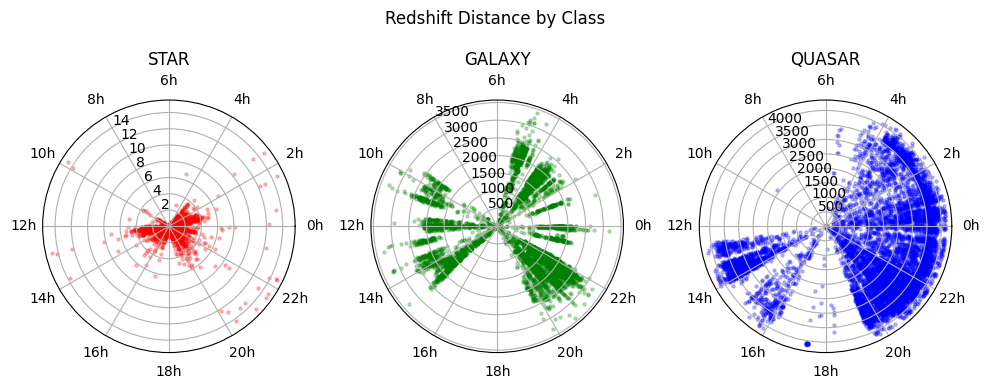

In [ ]:
# now that we ave distance let's look that how each type is distributed
def redshift_dist(df):
    fig, ax = plt.subplots(1,3,figsize=(10, 8),subplot_kw={'projection': 'polar'})
    fig.suptitle("Redshift Distance by Class",y=0.75)
    ax = ax.flatten()
    class_colors = {'STAR': 'red', 'QSO': 'blue', 'GALAXY': 'green'}
    
    for i, obj_type in enumerate(df['class'].unique()):
        dist = df_distance[df_distance['class']==obj_type]['dist']
        dist_scaler = np.array([Mpc.value for Mpc in dist])
        ra_deg = df_distance[df_distance['class']==obj_type]['ra']-180
        ra_rad = np.radians(ra_deg)
        ax[i].scatter(ra_rad, dist_scaler, s=5, alpha=0.25, color=class_colors[obj_type]) 
        if obj_type == 'QSO':
            ax[i].set_title("QUASAR")
        else:
            ax[i].set_title(f"{obj_type}")
        ax[i].set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))  # Divide into 12
        ax[i].set_xticklabels(['0h', '2h', '4h', '6h', '8h', '10h', '12h', '14h', '16h', '18h', '20h', '22h'])
        ax[i].set_rlabel_position(120)
        ax[i].grid(True)
    
    fig.tight_layout()
    plt.show()

redshift_dist(df_distance)

In [146]:
print(df_distance[df_distance['class']=='STAR']['dist'].describe())
print(df_distance[df_distance['class']=='QSO']['dist'].describe())
print(df_distance[df_distance['class']=='GALAXY']['dist'].describe())

count                       5229
unique                      5220
top       14.741009505864746 Mpc
freq                           6
Name: dist, dtype: object
count                       9998
unique                      9981
top       3378.2814378752255 Mpc
freq                           2
Name: dist, dtype: object
count                       6547
unique                      6544
top       1936.1341898030648 Mpc
freq                           2
Name: dist, dtype: object
